In [1]:
import pandas as pd
import numpy as np

In [2]:
dataset = pd.read_csv('C:/Users/wyuning/Desktop/New folder/10TD/TD10_all.csv')
data_setgood = pd.read_csv('C:/Users/wyuning/Desktop/New folder/10TD/TD10_pristine.csv')

In [3]:
data_setgood.head()

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.6491,0.6492,0.6493,0.6494,0.6495,0.6496,0.6497,0.6498,0.6499,0.6500
0,-0.20745,-0.17110,-0.12941,-0.080759,-0.027286,0.029392,0.085521,0.13793,0.18017,0.21276,...,0.004273,0.003205,0.004792,0.007997,0.007997,0.005860,0.003724,0.001587,0.002136,0
1,-0.19729,-0.15773,-0.11122,-0.059883,-0.005372,0.050787,0.105300,0.15505,0.19888,0.23309,...,0.009614,0.007478,0.005341,0.003205,-0.000549,-0.000549,0.002655,0.004792,0.005341,0
2,-0.22403,-0.18822,-0.14278,-0.089305,-0.029423,0.029392,0.084452,0.13310,0.17534,0.21225,...,0.006410,0.009065,0.009614,0.006410,0.002136,-0.000549,0.001587,0.007478,0.011201,0
3,-0.19784,-0.15773,-0.10750,-0.049200,0.010133,0.070565,0.124560,0.17376,0.21276,0.24112,...,0.000000,0.000519,0.000519,-0.001618,-0.003235,-0.002167,0.003205,0.007997,0.011751,0
4,-0.21710,-0.18447,-0.14598,-0.097851,-0.041173,0.019228,0.078043,0.12938,0.17321,0.20904,...,-0.002167,-0.000549,0.000519,0.002655,0.004792,0.005860,0.004273,0.002136,0.002136,0


In [4]:
dataset.shape

(420, 6500)

In [5]:
data_setgood.shape

(280, 6501)

In [6]:
CLASS_NORMAL = 0
class_names = ['Normal','weld','joint','defect']

In [7]:
new_columns = list(data_setgood.columns)
new_columns[-1] = 'target'
data_setgood.columns = new_columns

In [8]:
data_setgood.target.value_counts()

0    280
Name: target, dtype: int64

In [9]:
np.random.seed(42)
X = np.random.randint(280,size=280)
normal_df = data_setgood[data_setgood.target == 0].drop(labels='target', axis=1)
normal_df = normal_df.iloc[X]
normal_df.shape
inp_sig = normal_df

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
train_df, val_df = train_test_split(
  inp_sig,
  test_size=0.3,
  random_state=42
)
val_df, test_df = train_test_split(
  val_df,
  test_size=0.5,
  random_state=42
)

In [12]:
print(train_df.shape)
print(val_df.shape)
print(test_df.shape)

(196, 6500)
(42, 6500)
(42, 6500)


In [13]:
import keras
from keras import layers

Using TensorFlow backend.
C:\Users\wyuning\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\wyuning\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\wyuning\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\wyuning\anaconda3\lib\site-packages\tensorflow\python\framework\d

In [14]:
input_sig = keras.Input(shape=(6500,))
encoded = layers.Dense(4000, activation='relu')(input_sig)
encoded = layers.Dense(2000, activation='relu')(encoded)
encoded = layers.Dense(500, activation='relu')(encoded)
encoded = layers.Dense(2, activation='relu')(encoded)
decoded = layers.Dense(500, activation='relu')(encoded)
decoded = layers.Dense(2000, activation='relu')(decoded)
decoded = layers.Dense(4000, activation='relu')(decoded)
decoded = layers.Dense(6500, activation='linear')(decoded)

In [15]:
autoencoder = keras.Model(input_sig, decoded)
autoencoder.compile(optimizer='adam', loss='mae')
autoencoder.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 6500)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 4000)              26004000  
_________________________________________________________________
dense_2 (Dense)              (None, 2000)              8002000   
_________________________________________________________________
dense_3 (Dense)              (None, 500)               1000500   
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 1002      
_________________________________________________________________
dense_5 (Dense)              (None, 500)               1500      
_________________________________________________________________
dense_6 (Dense)              (None, 2000)              1002

In [ ]:
history=autoencoder.fit(train_df, train_df,
                epochs=100,
                batch_size=100,
                shuffle=True,
                validation_data=(val_df, val_df))


Train on 196 samples, validate on 42 samples
Epoch 1/100
196/196 [==============================] - 1s 6ms/step - loss: 0.0148 - val_loss: 0.0137
Epoch 2/100
196/196 [==============================] - 1s 5ms/step - loss: 0.0139 - val_loss: 0.0129
Epoch 3/100
196/196 [==============================] - 1s 5ms/step - loss: 0.0131 - val_loss: 0.0121
Epoch 4/100
196/196 [==============================] - 1s 6ms/step - loss: 0.0122 - val_loss: 0.0110
Epoch 5/100
196/196 [==============================] - 1s 6ms/step - loss: 0.0110 - val_loss: 0.0099
Epoch 6/100
196/196 [==============================] - 1s 6ms/step - loss: 0.0102 - val_loss: 0.0094
Epoch 7/100
196/196 [==============================] - 1s 6ms/step - loss: 0.0096 - val_loss: 0.0087
Epoch 8/100
196/196 [==============================] - 1s 6ms/step - loss: 0.0090 - val_loss: 0.0085
Epoch 9/100
196/196 [==============================] - 1s 6ms/step - loss: 0.0089 - val_loss: 0.0084
Epoch 10/100
196/196 [=======================

In [82]:
decoded_sigs = autoencoder.predict(dataset)


In [83]:
decoded_sigs = pd.DataFrame(decoded_sigs) 
decoded_sigs.to_csv('decoded_sigs_td10.csv')

In [84]:
encoder = keras.Model(input_sig, encoded)

In [85]:
encoder.summary()

Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 6500)              0         
_________________________________________________________________
dense_33 (Dense)             (None, 4000)              26004000  
_________________________________________________________________
dense_34 (Dense)             (None, 2000)              8002000   
_________________________________________________________________
dense_35 (Dense)             (None, 1000)              2001000   
_________________________________________________________________
dense_36 (Dense)             (None, 500)               500500    
Total params: 36,507,500
Trainable params: 36,507,500
Non-trainable params: 0
_________________________________________________________________


In [86]:
encoded_imgs = encoder.predict(dataset)

In [87]:
encoded_imgs = pd.DataFrame(encoded_imgs) 
encoded_imgs.to_csv('latentent_td30.csv')

In [ ]:
import matplotlib.pyplot as plt

In [168]:
print(history.history.keys())

dict_keys(['val_loss', 'loss'])


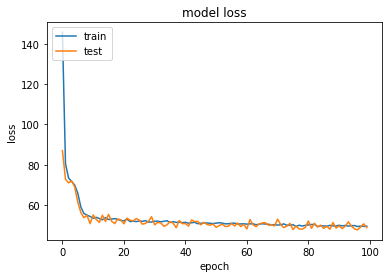

In [169]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()